In [1]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

train_df['input_str'] = train_df['input_str'].apply(lambda x : x[3:])
valid_df['input_str'] = valid_df['input_str'].apply(lambda x : x[3:])

In [2]:
num_feat = 47

def get_columns (df) :
    for i in range(num_feat):
        df[f'c_{i}'] = df['input_str'].apply(lambda x : x[i])
    return df.drop(columns = ['input_str'])

train_df = get_columns(train_df)
valid_df = get_columns(valid_df)

## One Hot Encoding

In [3]:
# Feature engineering (example: one-hot encoding)
from sklearn.preprocessing import OneHotEncoder
from preprocess import one_hot_encode

train_df, valid_df, y_train, y_valid = one_hot_encode(train_df, valid_df)

In [4]:
y_valid.shape

(489,)

In [5]:
x_train = train_df.values
x_valid = valid_df.values

In [6]:
x_valid.shape

(489, 467)

In [7]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions
import matplotlib.pyplot as plt

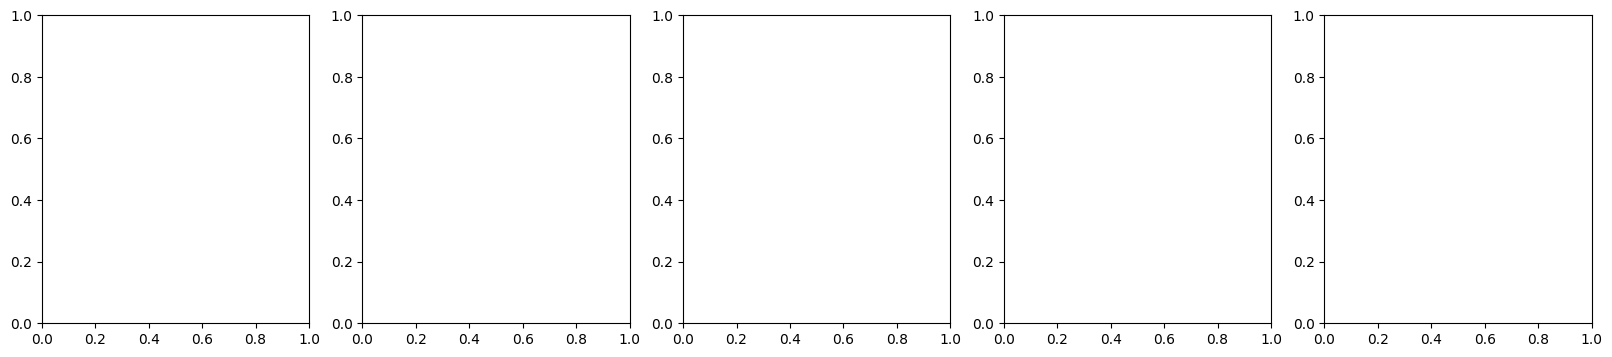

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

In [9]:
y_pred_rf = predict_random_forest(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_trai

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'random_state': 42}
Best Score: 0.6683615819209041
==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.67      0.71      0.69       252
     Class 1       0.68      0.63      0.65       237

    accuracy                           0.67       489
   macro avg       0.67      0.67      0.67       489
weighted avg       0.67      0.67      0.67       489

Accuracy is 0.6748466257668712
==========Random Forest==========


In [ ]:

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [15:14:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/arush-upadhyaya/anaconda3/

In [ ]:
y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])


In [ ]:
y_pred_mlp = predict_mlp(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])


In [ ]:
y_pred_svc = predict_svc(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])


In [ ]:

plt.tight_layout()
plt.show()

In [ ]:
from models import predict_mnb

y_pred_mnb = predict_mnb(x_train, y_train, x_valid, grid_search=True)
evaluate_predictions(y_valid, y_pred_mnb, 'Multinomial Naive Bayes')